In [6]:
# Date: 15 Febraury 2024
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("../datasets/fruit_data_with_colours.csv")
data.isnull().sum()
data.head()
data.describe()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


<Figure size 600x600 with 0 Axes>

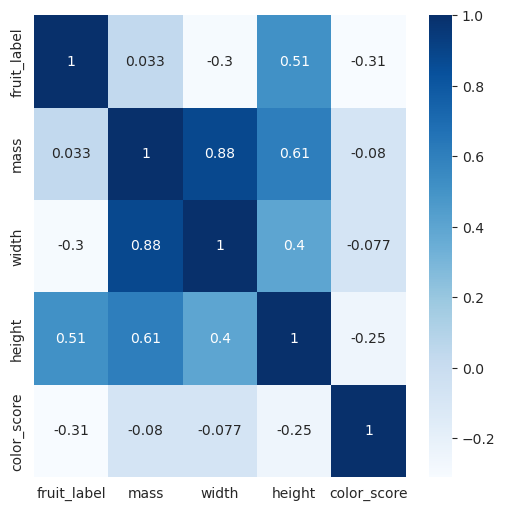

In [45]:
# Correlation
top_corr_features = corr_matrix.index

data.corr(method="pearson")
corr_matrix = data.corr()

plt.figure(figsize=(6, 6))
g=sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="Blues")

0.68 ___k___ 1
0.66 ___k___ 2
0.68 ___k___ 3
0.66 ___k___ 4
0.59 ___k___ 5
0.58 ___k___ 6
0.56 ___k___ 7
0.63 ___k___ 8
0.56 ___k___ 9


Text(0.5, 0, 'Number of Neighbors (K)')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

0.5566666666666668


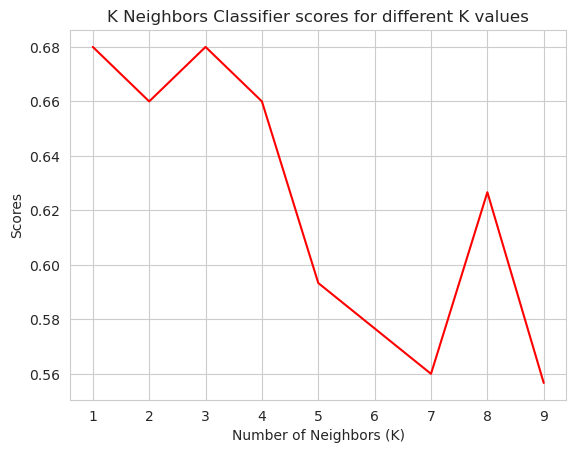

In [64]:
# There is strong relation color with height


feature_cols = ['mass', 'width', 'height']
X = data[feature_cols]
y = data['fruit_label']


sns.set_style('whitegrid')

from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    print("%.2f" % score.mean(), '___k___', k) 
    knn_scores.append(score.mean())
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')



knn = KNeighborsClassifier(n_neighbors = 3)
score=cross_val_score(knn_classifier,X,y,cv=10)
print(score.mean())

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

KNeighborsClassifier(n_neighbors=3)

0.6666666666666666


In [61]:
feature_cols = ['mass', 'width', 'height']

test1 = (162, 8.4, 7.3) # CP, Thalach, Slope
test1 = np.asarray(test1)
test1 = test1.reshape(1,-1)
test1_predict = knn.predict(test1)
test1_predict[0]

1